#CUSTOMER SEGMENTATION CASE
##Reza Dwi Putra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rezadepe/Portfolio/main/customer_segmentation_dataset.csv')

In [ ]:
df.info()
#semua kolom memiliki nilai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustID             200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   AnnualIncome       200 non-null    int64 
 4   CustScore (1-100)  200 non-null    int64 
 5   Hometown           200 non-null    object
 6   FavoriteTime       200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,CustID,Age,AnnualIncome,CustScore (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.415000,44234.100000,46.915000
std,57.879185,13.956241,21477.387318,28.979941
min,1.000000,18.000000,10000.000000,1.000000
25%,50.750000,30.000000,24545.000000,22.000000
50%,100.500000,36.000000,45000.000000,46.000000
75%,150.250000,49.000000,60000.000000,69.000000
max,200.000000,75.000000,90000.000000,100.000000


In [ ]:
df

,CustID,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
0,1,Female,20,20000,1,Jakarta,Weekend
1,2,Male,21,34000,81,Jakarta,Weekend
2,3,Female,18,12350,1,Jakarta,Weekend
3,4,Male,45,12000,1,Bandung,Weekday
4,5,Male,31,18000,10,Bandung,Weekend
...,...,...,...,...,...,...,...
195,196,Female,35,67500,79,Bandung,Weekday
196,197,Female,45,76000,28,Bandung,Weekday
197,198,Male,32,89000,74,Bandung,Weekday
198,199,Male,32,90000,18,Bandung,Weekday


In [ ]:
#duplicate dataframe to transform & explore
df1 = df.copy()
df1

,CustID,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
0,1,Female,20,20000,1,Jakarta,Weekend
1,2,Male,21,34000,81,Jakarta,Weekend
2,3,Female,18,12350,1,Jakarta,Weekend
3,4,Male,45,12000,1,Bandung,Weekday
4,5,Male,31,18000,10,Bandung,Weekend
...,...,...,...,...,...,...,...
195,196,Female,35,67500,79,Bandung,Weekday
196,197,Female,45,76000,28,Bandung,Weekday
197,198,Male,32,89000,74,Bandung,Weekday
198,199,Male,32,90000,18,Bandung,Weekday


In [ ]:
#Replace string to int 
#Gender : Female = 0, Male = 1
#Favorite Time : Weekend = 0, Weekday = 1

df1['Gender'].replace(to_replace = 'Female', value = 0, inplace=True)
df1['Gender'].replace(to_replace = 'Male', value = 1, inplace=True)
df1['FavoriteTime'].replace(to_replace = 'Weekend', value = 0, inplace=True)
df1['FavoriteTime'].replace(to_replace = 'Weekday', value = 1, inplace=True)

In [ ]:
# list of city on Hometown feature
list_city = df1['Hometown'].unique()
list_city.tolist()

['Jakarta',
 'Bandung',
 'Surabaya',
 'Solo',
 'Semarang',
 'Palangkaraya',
 'Padang']

In [ ]:
#split dataset with gender and favoritetime for further exploration
df_f = df1[df1['Gender'] == 0]
df_m = df1[df1['Gender'] == 1]
df_weekend = df1[df1['FavoriteTime'] == 0]
df_weekday = df1[df1['FavoriteTime'] == 1]

# EDA

In [ ]:
df1.describe()


,CustID,Gender,Age,AnnualIncome,CustScore (1-100),FavoriteTime
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.45500,39.415000,44234.100000,46.915000,0.245000
std,57.879185,0.49922,13.956241,21477.387318,28.979941,0.431166
min,1.000000,0.00000,18.000000,10000.000000,1.000000,0.000000
25%,50.750000,0.00000,30.000000,24545.000000,22.000000,0.000000
50%,100.500000,0.00000,36.000000,45000.000000,46.000000,0.000000
75%,150.250000,1.00000,49.000000,60000.000000,69.000000,0.000000
max,200.000000,1.00000,75.000000,90000.000000,100.000000,1.000000



master dataset (200 Customers)

based on median and mean within gender, count of female cust is higher than male cust,
and overall favorite time to spend is on the weekend.

median cust score is 46 and based on 1-100 score, therefore we could assume that the cusomers purchase intensity still below half of the full score

based on the percentile and average, we could asume that most of the customers age is belongs to productive age

Customers annual income is in the range of 10k to 90k and average cust income is 44k


In [ ]:
#female dataset
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,109.0,98.688073,58.229701,1.0,47.0,97.0,149.0,197.0
Gender,109.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,109.0,38.477064,12.716711,18.0,30.0,36.0,49.0,68.0
AnnualIncome,109.0,42972.110092,21230.180783,10500.0,23700.0,43000.0,56000.0,90000.0
CustScore (1-100),109.0,48.990826,26.781176,1.0,28.0,46.0,71.0,100.0
FavoriteTime,109.0,0.284404,0.453214,0.0,0.0,0.0,1.0,1.0


Female dataset 

109 of 200 cust (54.5%)

average age of female cust is 38 y.o with 43k average annual income 

female cust median purchase intesity score is 46

their favorite time is 0.28 (higher than male cust with 0.19 on avg result),

therefore most of female cust tend to shop on the weekend but they also have around 25% of female population who shop on the weekday



In [ ]:
#male dataset
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,91.0,102.670330,57.703082,2.0,59.0,104.0,150.5,200.0
Gender,91.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,91.0,40.538462,15.305996,18.0,30.0,37.0,50.0,75.0
AnnualIncome,91.0,45745.714286,21790.671916,10000.0,29000.0,45000.0,62000.0,90000.0
CustScore (1-100),91.0,44.428571,31.381928,1.0,14.0,45.0,66.5,100.0
FavoriteTime,91.0,0.197802,0.400549,0.0,0.0,0.0,0.0,1.0


  Male dataset

  91 of 200 cust (45.5%)

  average age of male cust is 40 y.o with 45k average annual income 

  male cust median purchase intesity score is 45

  their favorite time is 0.19 (lower than male cust with 0.28 on avg result),

  therefore most of male cust tend to shop on the weekend



In [ ]:
#weekend dataset
df_weekend.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,151.0,108.880795,51.955998,1.0,76.5,114.0,151.5,189.0
Gender,151.0,0.483444,0.501389,0.0,0.0,0.0,1.0,1.0
Age,151.0,39.112583,13.857149,18.0,29.5,37.0,49.0,75.0
AnnualIncome,151.0,45972.582781,21534.342106,10000.0,27000.0,46000.0,62000.0,90000.0
CustScore (1-100),151.0,47.966887,29.320622,1.0,22.0,46.0,70.0,100.0
FavoriteTime,151.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#weekday dataset
df_weekday.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,49.0,74.673469,67.460911,4.0,31.0,47.0,69.0,200.0
Gender,49.0,0.367347,0.487078,0.0,0.0,0.0,1.0,1.0
Age,49.0,40.346939,14.362206,18.0,31.0,36.0,50.0,70.0
AnnualIncome,49.0,38876.734694,20601.594840,10500.0,24000.0,33000.0,50000.0,90000.0
CustScore (1-100),49.0,43.673469,27.947412,1.0,22.0,35.0,67.0,98.0
FavoriteTime,49.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Weekend vs weekday dataset

151 of 200 cust (75.5%) vs 49 of 200 cust (24.5%)

average age of weekend shopper is higher than weekday shopper (45k vs 38k)

median puschase intesity score on the weekend is higher than weekday shopper (46 vs 35)


## EDA


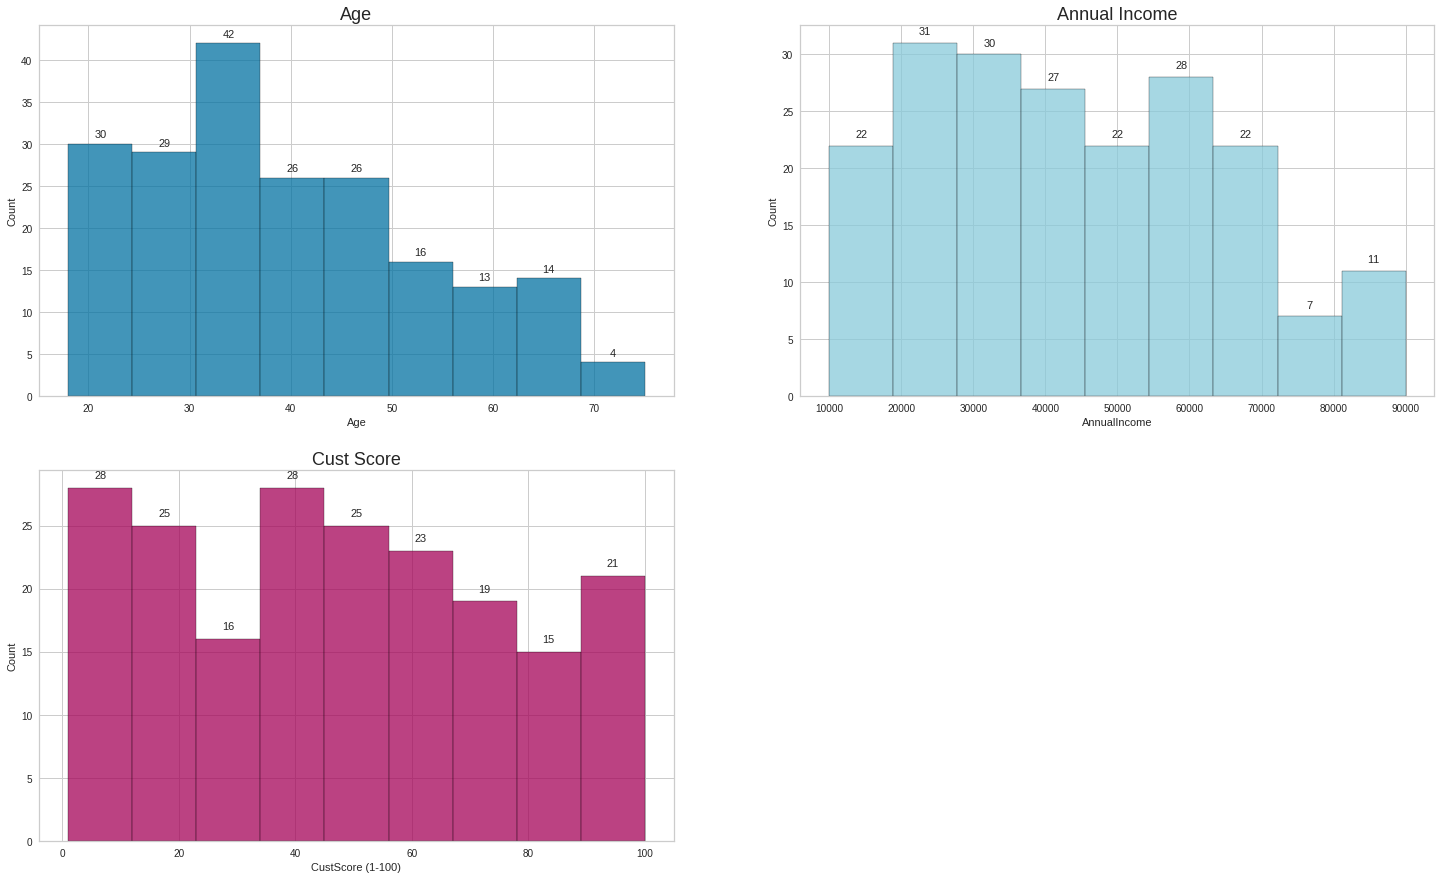

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1) 
plt.title('Age',fontsize=18)
ax = sns.histplot(x=df1['Age'],color='b')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)
    
plt.subplot(2,2,2) 
plt.title('Annual Income',fontsize=18)
ax2 = sns.histplot(x=df1['AnnualIncome'],color='c')
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)
    
plt.subplot(2,2,3) 
plt.title('Cust Score',fontsize=18)
ax3 = sns.histplot(x=df1['CustScore (1-100)'],color='m')
for rect in ax3.patches:
    ax3.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

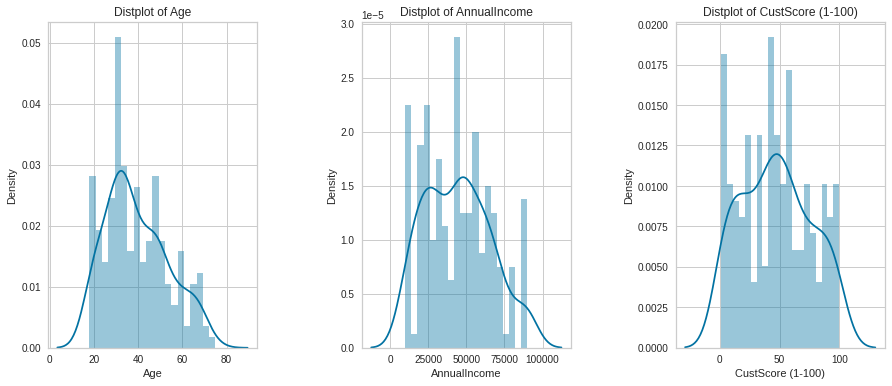

In [ ]:
#check distribution
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df1[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

kelompok usia 30 - 40 memiliki populasi yang paling banyak

berdasarkan pendapatan, customer dengan range pendapatan antara 25-50k lebih banyak diantara cust lain

berdasarkan customer score, customer dengan skor di kisaran 50 memiliki jumlah yang terbanyak.

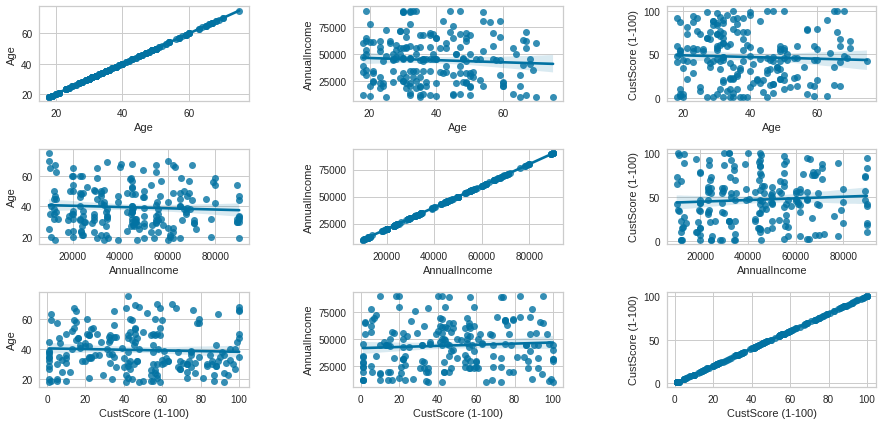

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
    for y in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df1)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

###scatterplot refer to gender

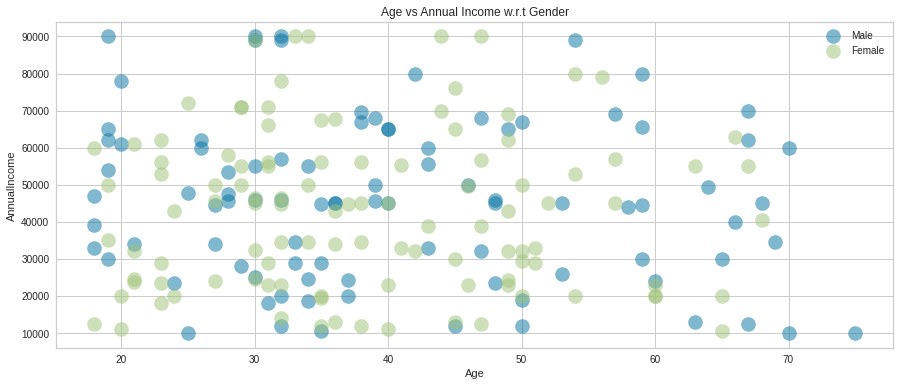

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'AnnualIncome' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('AnnualIncome') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

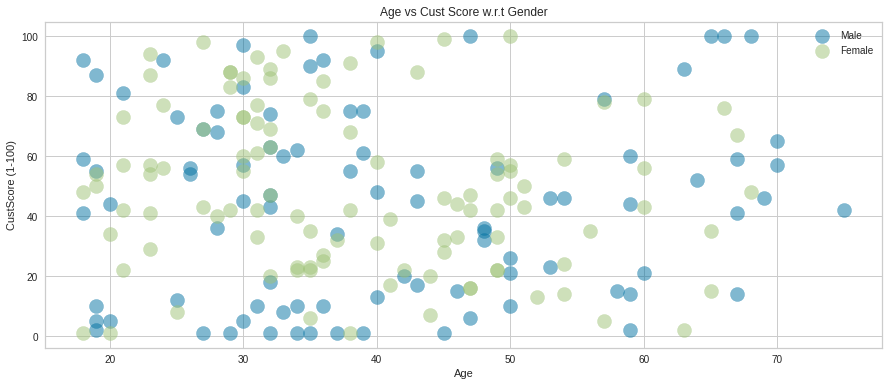

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'CustScore (1-100)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('CustScore (1-100)') 
plt.title('Age vs Cust Score w.r.t Gender')
plt.legend()
plt.show()

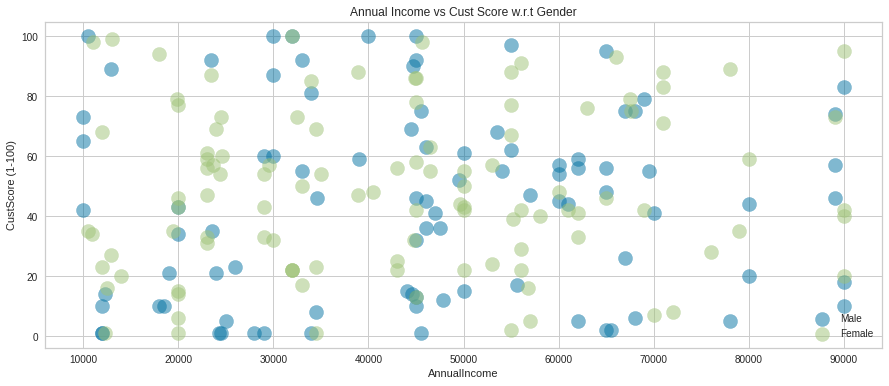

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'AnnualIncome',y = 'CustScore (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('AnnualIncome'), plt.ylabel('CustScore (1-100)') 
plt.title('Annual Income vs Cust Score w.r.t Gender')
plt.legend()
plt.show()

###scatterplot refer to Hometown

In [ ]:
#seperate jakarta and non jakarta
df_jak_else = pd.get_dummies(df, columns = ['Hometown'])
df_jak_else = df_jak_else.drop(['CustID','Hometown_Bandung','Hometown_Padang','Hometown_Palangkaraya','Hometown_Semarang','Hometown_Solo','Hometown_Surabaya'], axis = 1)
df_jak_else = df_jak_else.assign(Hometown_Jakarta = ['Jakarta' if Hometown_Jakarta == 1 else 'Non Jakarta' for Hometown_Jakarta in df_jak_else['Hometown_Jakarta']])

df_jak_else

,Gender,Age,AnnualIncome,CustScore (1-100),FavoriteTime,Hometown_Jakarta
0,Female,20,20000,1,Weekend,Jakarta
1,Male,21,34000,81,Weekend,Jakarta
2,Female,18,12350,1,Weekend,Jakarta
3,Male,45,12000,1,Weekday,Non Jakarta
4,Male,31,18000,10,Weekend,Non Jakarta
...,...,...,...,...,...,...
195,Female,35,67500,79,Weekday,Non Jakarta
196,Female,45,76000,28,Weekday,Non Jakarta
197,Male,32,89000,74,Weekday,Non Jakarta
198,Male,32,90000,18,Weekday,Non Jakarta


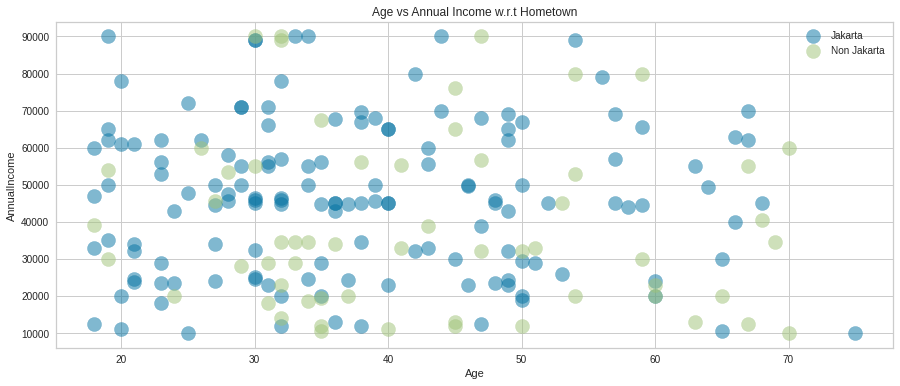

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for Hometown_Jakarta in ['Jakarta', 'Non Jakarta']:
    plt.scatter(x = 'Age' , y = 'AnnualIncome' , data = df_jak_else[df_jak_else['Hometown_Jakarta'] == Hometown_Jakarta] ,
                s = 200 , alpha = 0.5 , label = Hometown_Jakarta)
plt.xlabel('Age'), plt.ylabel('AnnualIncome') 
plt.title('Age vs Annual Income w.r.t Hometown')
plt.legend()
plt.show()

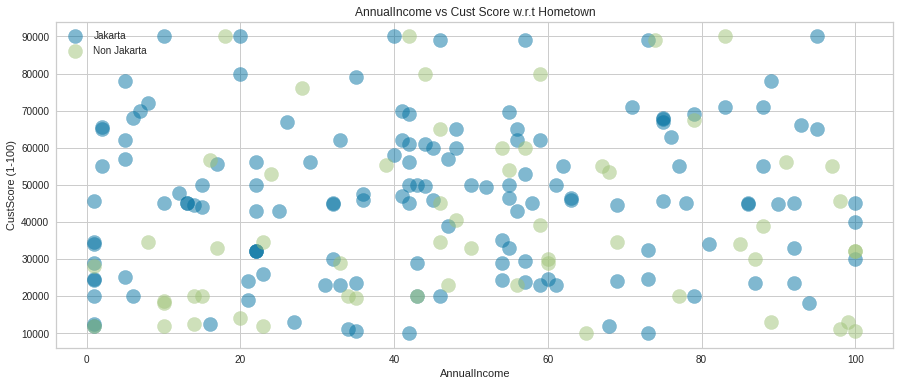

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for Hometown_Jakarta in ['Jakarta', 'Non Jakarta']:
    plt.scatter(x = 'CustScore (1-100)' , y = 'AnnualIncome' , data = df_jak_else[df_jak_else['Hometown_Jakarta'] == Hometown_Jakarta] ,
                s = 200 , alpha = 0.5 , label = Hometown_Jakarta)
plt.xlabel('AnnualIncome'), plt.ylabel('CustScore (1-100)') 
plt.title('AnnualIncome vs Cust Score w.r.t Hometown')
plt.legend()
plt.show()

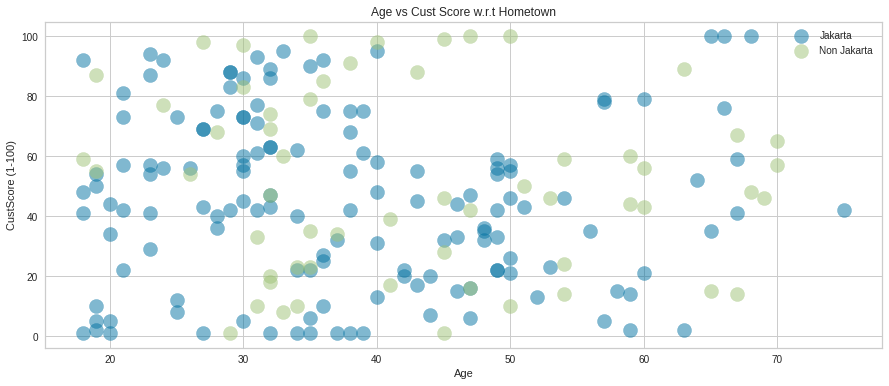

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for Hometown_Jakarta in ['Jakarta', 'Non Jakarta']:
    plt.scatter(x = 'Age' , y = 'CustScore (1-100)' , data = df_jak_else[df_jak_else['Hometown_Jakarta'] == Hometown_Jakarta] ,
                s = 200 , alpha = 0.5 , label = Hometown_Jakarta)
plt.xlabel('Age'), plt.ylabel('CustScore (1-100)') 
plt.title('Age vs Cust Score w.r.t Hometown')
plt.legend()
plt.show()

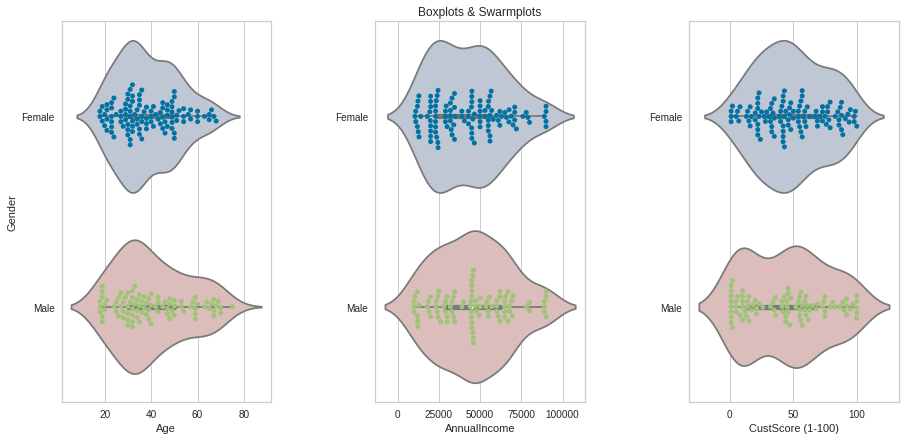

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

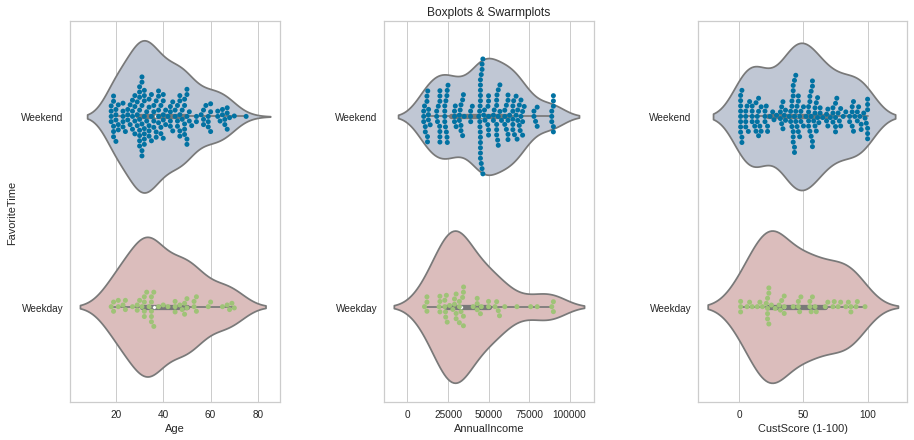

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'FavoriteTime' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'FavoriteTime' , data = df)
    plt.ylabel('FavoriteTime' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

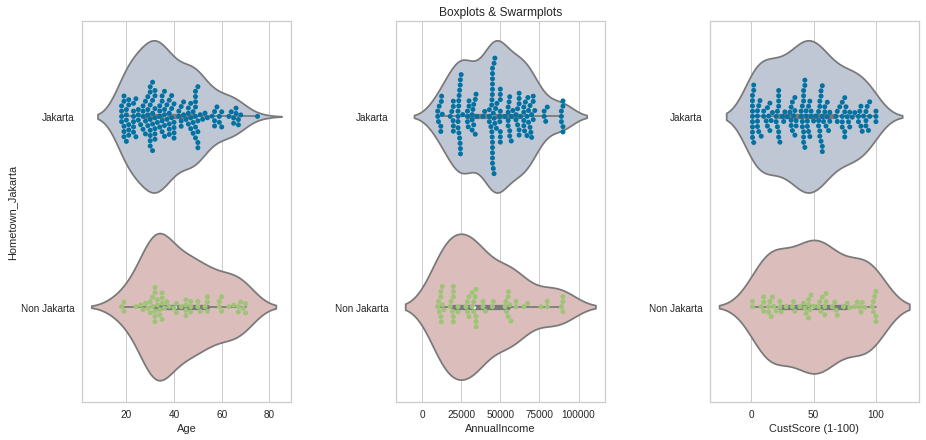

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'AnnualIncome' , 'CustScore (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Hometown_Jakarta' , data = df_jak_else , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Hometown_Jakarta' , data = df_jak_else)
    plt.ylabel('Hometown_Jakarta' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

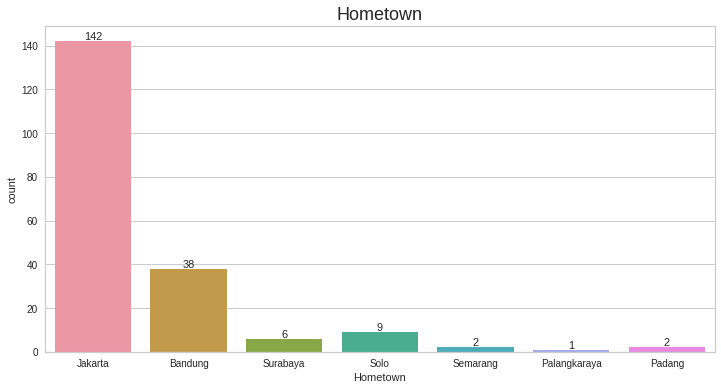

In [ ]:
#shopper hometown count

plt.figure(figsize=(12, 6))
plt.title('Hometown',fontsize=18)
ax = sns.countplot(x="Hometown", data=df1)

#show data count label
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)

plt.show()


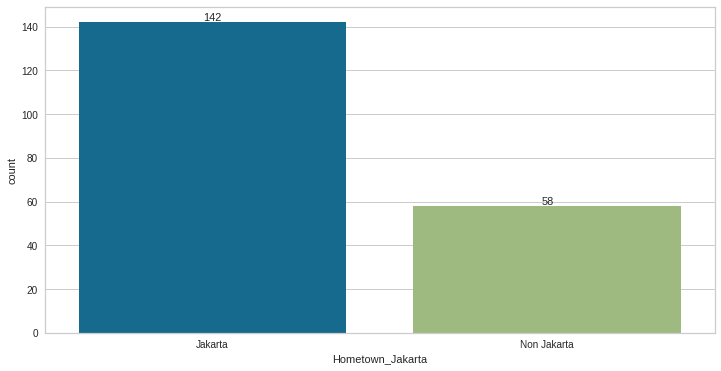

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Hometown_Jakarta", data=df_jak_else)

#show data count label
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)

plt.show()


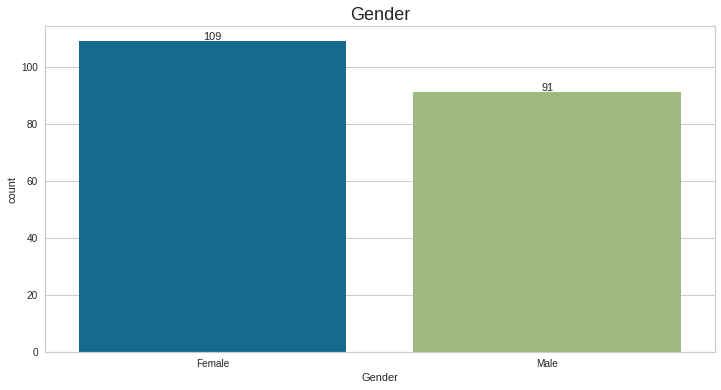

In [ ]:
#gender

plt.figure(figsize=(12, 6))
plt.title('Gender',fontsize=18)
ax = sns.countplot(x="Gender", data=df)
#show data count label
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)

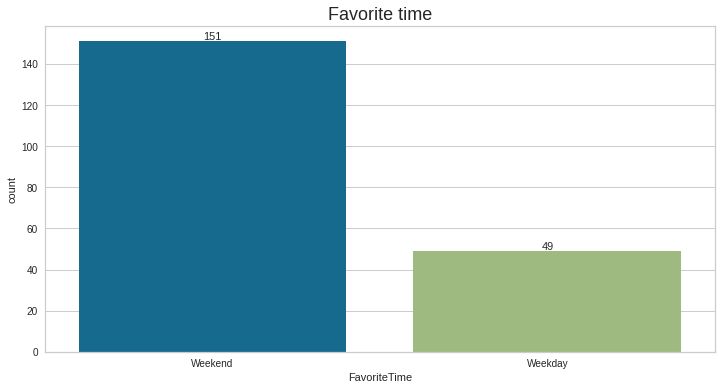

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Favorite time',fontsize=18)
ax = sns.countplot(x="FavoriteTime", data=df)
#show data count label
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)

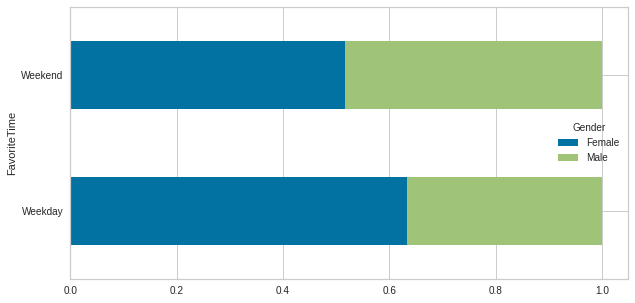

In [ ]:

df.groupby('FavoriteTime')['Gender'].value_counts(normalize=True).unstack('Gender').plot.barh(stacked=True,figsize=(10, 5))

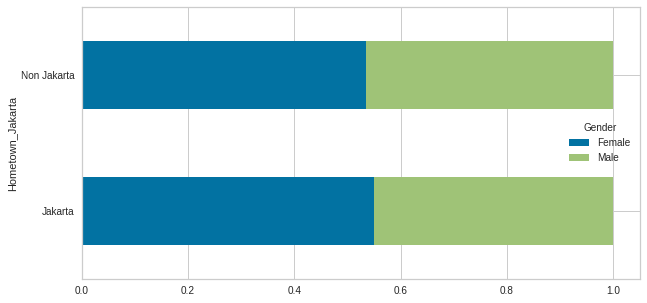

In [ ]:
df_jak_else.groupby('Hometown_Jakarta')['Gender'].value_counts(normalize=True).unstack('Gender').plot.barh(stacked=True,figsize=(10, 5))

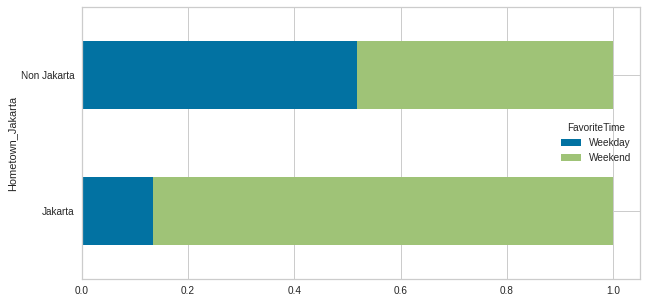

In [ ]:
df_jak_else.groupby('Hometown_Jakarta')['FavoriteTime'].value_counts(normalize=True).unstack('FavoriteTime').plot.barh(stacked=True,figsize=(10, 5))

#Customers Clustering models with Kmeans

In [ ]:
#Alg Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

##preprocessing

In [ ]:
#Handle Categorical data

#reminder# gender : 0 = f, 1 = m. favetime : 0 = weekend, 1 = weekday

df2 = pd.get_dummies(df1, columns = ['Hometown'])
df2 = df2.drop(['CustID','Hometown_Bandung','Hometown_Padang','Hometown_Palangkaraya','Hometown_Semarang','Hometown_Solo','Hometown_Surabaya'], axis = 1)
df2

,Gender,Age,AnnualIncome,CustScore (1-100),FavoriteTime,Hometown_Jakarta
0,0,20,20000,1,0,1
1,1,21,34000,81,0,1
2,0,18,12350,1,0,1
3,1,45,12000,1,1,0
4,1,31,18000,10,0,0
...,...,...,...,...,...,...
195,0,35,67500,79,1,0
196,0,45,76000,28,1,0
197,1,32,89000,74,1,0
198,1,32,90000,18,1,0


In [ ]:
df3 = df2.drop(['Gender','FavoriteTime','Hometown_Jakarta'], axis = 1)
df3['AnnualIncome'] = df3['AnnualIncome'].div(1000)
df3

,Age,AnnualIncome,CustScore (1-100)
0,20,20.00,1
1,21,34.00,81
2,18,12.35,1
3,45,12.00,1
4,31,18.00,10
...,...,...,...
195,35,67.50,79
196,45,76.00,28
197,32,89.00,74
198,32,90.00,18


In [ ]:
#Data standardization

scaler = MinMaxScaler().fit(df2)
features = ['Gender', 'Age', 'AnnualIncome', 'CustScore (1-100)','FavoriteTime','Hometown_Jakarta']

df_scaled = df2.copy()
df_scaled[features] = scaler.transform(df_scaled[features])

df_scaled.head()

,Gender,Age,AnnualIncome,CustScore (1-100),FavoriteTime,Hometown_Jakarta
0,0.0,0.035088,0.125000,0.000000,0.0,1.0
1,1.0,0.052632,0.300000,0.808081,0.0,1.0
2,0.0,0.000000,0.029375,0.000000,0.0,1.0
3,1.0,0.473684,0.025000,0.000000,1.0,0.0
4,1.0,0.228070,0.100000,0.090909,0.0,0.0


In [ ]:
#Data standardization 2

scaler = MinMaxScaler().fit(df3)
features = [ 'Age', 'AnnualIncome', 'CustScore (1-100)']

df_scaled1 = df3.copy()
df_scaled1[features] = scaler.transform(df_scaled1[features])

df_scaled1.head()

,Age,AnnualIncome,CustScore (1-100)
0,0.035088,0.125000,0.000000
1,0.052632,0.300000,0.808081
2,0.000000,0.029375,0.000000
3,0.473684,0.025000,0.000000
4,0.228070,0.100000,0.090909


##Modeling

##Clustering age & Income

In [ ]:
X1 = df3[['Age' ,'AnnualIncome']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


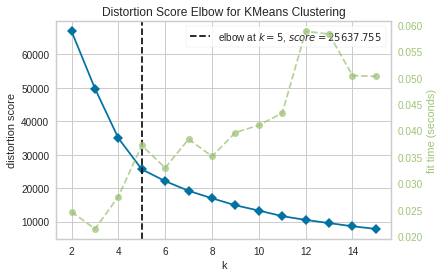

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=15)

visualizer.fit(X1)       
visualizer.show()   

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 11  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

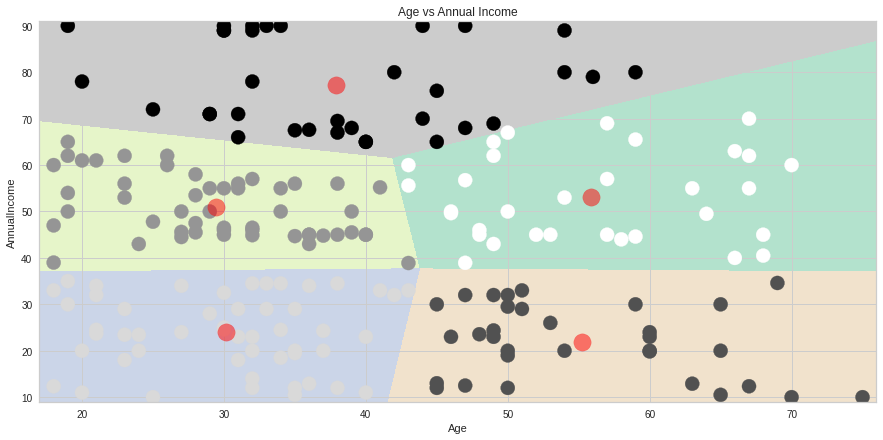

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'AnnualIncome', data = df3 , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('AnnualIncome') , plt.xlabel('Age')
plt.title('Age vs Annual Income')
plt.show()

In [ ]:
#create labels1 ('Age vs Annual Income' clustering) table
df3['labels1'] = labels1
df_labels1 = df3.copy()
df3 = df3.drop(['labels1'], axis = 1)
#df_labels1
#df3

##Clustering age & cust score

In [ ]:
X2 = df3[['Age' ,'CustScore (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 7  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



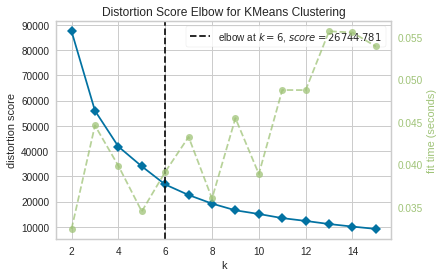

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=15)

visualizer.fit(X2)       
visualizer.show()   

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 7  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

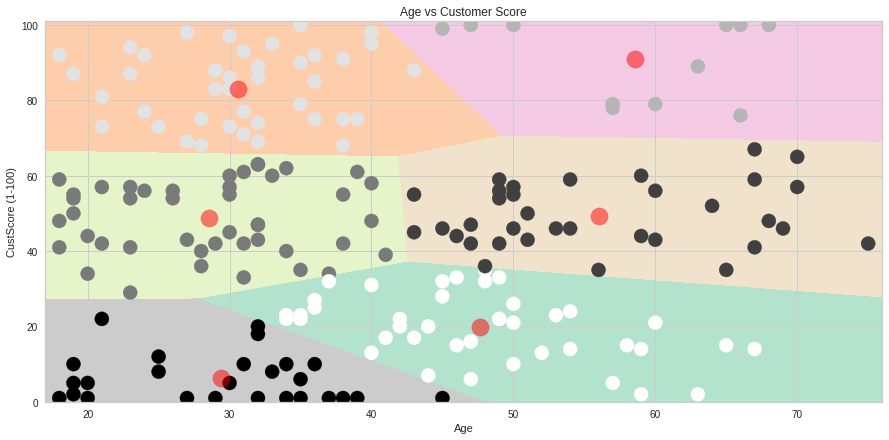

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'CustScore (1-100)', data = df3 , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('CustScore (1-100)') , plt.xlabel('Age')
plt.title('Age vs Customer Score')
plt.show()

In [ ]:
#create labels2 ('Age vs Customer Score' clustering) table
df3['labels2'] = labels2
df_labels2 = df3.copy()
df3 = df3.drop(['labels2'], axis = 1)
#df_labels2
#df3

##Clustering cust score & Income

In [ ]:
X3 = df3[['AnnualIncome' ,'CustScore (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 7  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


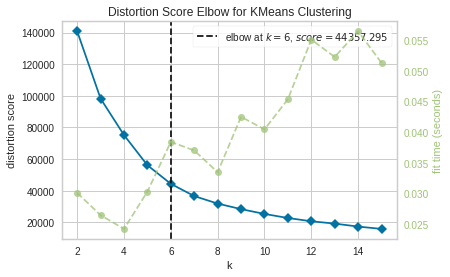

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=15)

visualizer.fit(X3)       
visualizer.show()

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 7  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

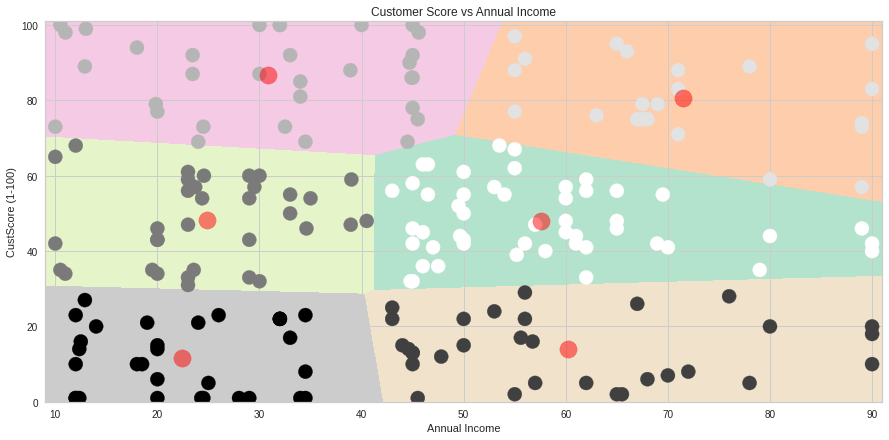

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'AnnualIncome' ,y = 'CustScore (1-100)', data = df3 , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('CustScore (1-100)') , plt.xlabel('Annual Income')
plt.title('Customer Score vs Annual Income')
plt.show()

In [ ]:
#create labels3 ('Annual Income vs Customer Score' clustering) table
df3['labels3'] = labels3
df_labels3 = df3.copy()
df3 = df3.drop(['labels3'], axis = 1)
#df_labels3

## 3 vars clustering

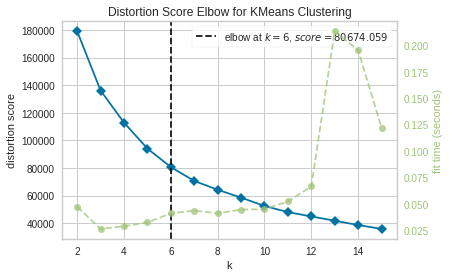

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=15)

visualizer.fit(df3)       
visualizer.show()       

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 7  , algorithm='elkan') )
algorithm.fit(df3)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

In [ ]:
df3['label4'] =  labels4
trace1 = go.Scatter3d(
    x= df3['Age'],
    y= df3['CustScore (1-100)'],
    z= df3['AnnualIncome'],
    mode='markers',
     marker=dict(
        color = df3['label4'], 
        size= 5,
        line=dict(
            color= df3['label4'],
            width= 3
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= '3 vars Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
#create labels4 ('Age vs Customer Score' clustering) table
df3 = df3.drop(['label4'], axis = 1)
df3['labels4'] = labels4
df_labels4 = df3.copy()
df3 = df3.drop(['labels4'], axis = 1)
df_labels4

,Age,AnnualIncome,CustScore (1-100),labels4
0,20,20.00,1,0
1,21,34.00,81,1
2,18,12.35,1,0
3,45,12.00,1,0
4,31,18.00,10,0
...,...,...,...,...
195,35,67.50,79,4
196,45,76.00,28,2
197,32,89.00,74,4
198,32,90.00,18,2


In [ ]:
#from google.colab import files
#df3.to_excel('df3.xlsx',encoding='utf-8',index=False)
#files.download('df3.xlsx')

In [ ]:
#All clusters dataset
df_clusters = df.copy()
df_clusters['labels1'] = labels1
df_clusters['labels2'] = labels2
df_clusters['labels3'] = labels3
df_clusters['labels4'] = labels4
df_clusters

,CustID,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime,labels1,labels2,labels3,labels4
0,1,Female,20,20000,1,Jakarta,Weekend,1,5,5,0
1,2,Male,21,34000,81,Jakarta,Weekend,1,1,2,1
2,3,Female,18,12350,1,Jakarta,Weekend,1,5,5,0
3,4,Male,45,12000,1,Bandung,Weekday,3,5,5,0
4,5,Male,31,18000,10,Bandung,Weekend,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,67500,79,Bandung,Weekday,4,1,1,4
196,197,Female,45,76000,28,Bandung,Weekday,4,0,4,2
197,198,Male,32,89000,74,Bandung,Weekday,4,1,1,4
198,199,Male,32,90000,18,Bandung,Weekday,4,5,4,2


In [ ]:
"""from google.colab import files
df_clusters.to_excel('df_clusters.xlsx',encoding='utf-8',index=False)
files.download('df_clusters.xlsx')"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>